# Generalized Linear Models (GLM) in Biology

GLMs are a flexible generalization of linear regression that allows for response variables that have error distribution models other than a normal distribution (remember the assumptions for linear models).The GLM generalizes linear regression by allowing the linear model to be related to the response variable via a **link function** and by allowing the **magnitude of the variance of each measurement to be a function of its predicted value**.



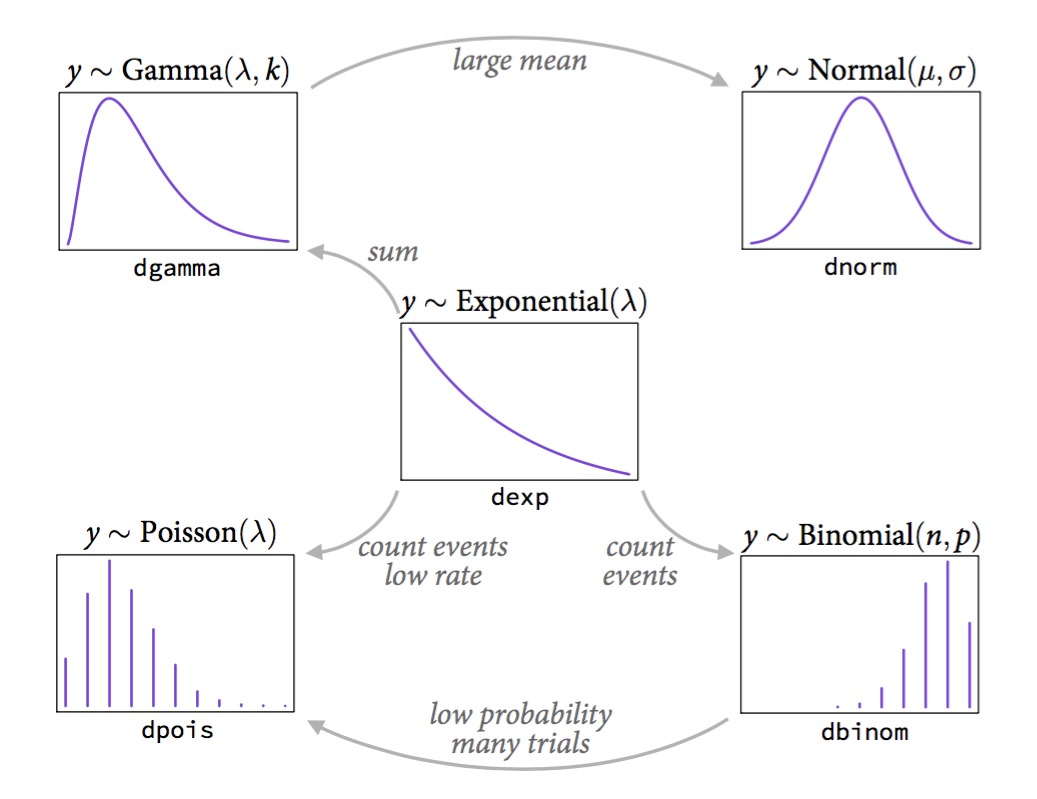


## Counts data 
Biololgical questions are often face with problems involving counting a number of things in a unite of time and space:

examples:

    - number of eggs produces by a female
    - number of deaths in a population
    - number of parasites on a individual
    

In this questions, the response variable is `counts` and the goal is to undertand how the `rate` of occurance of events (e.g., births) depends on the other variables (e.g. body size). 

Characteristics of `count` data:

1. data is bounded to zero and infinity
2. data is not normaly distributed
3. there is not consant mean-variance relationship



## Binomial data

Binomial data is also very common in biological problems. This type of data captures whether or not an event happens, such as the probability that an animal dies, does a plant flower, or is a species present in a habitat? Lake in any model, we can relate several variables to this outcome. For example, do individuals survive more as they become larger?

Characteristics of `Binomial` data:

1. data is bounded to zero and one (0 to 100%)
2. data is not normaly distributed
3. there is not consant mean-variance relationship




## Proportional data

Proportional data is also very common in biological problems. It is a special case of binomial data. This data for example referes to the proportion of females in a population, the proportion of flowering plants in a population, etc.

Characteristics of `proportional` data:

1. data is bounded to zero and one (0 to 100%)
2. data is not normaly distributed
3. there is not consant mean-variance relationship



## Key terms 

- family:it is the probability family distribution that is assumed to describe the response variables (a.k.a error family distribution). In linear model, this family is **Normal**. For count data it is often **Poisson** or *negative binomial*, and binomial data it is *binomial*, and for proportional data beta among others.

- linear prediction: this is a linear model that glues together the predictors to the response variable

-link function: it is a function that allows the linear predicture to map the response variable to the family.
    




## Soay sheep from Staint Kilda 

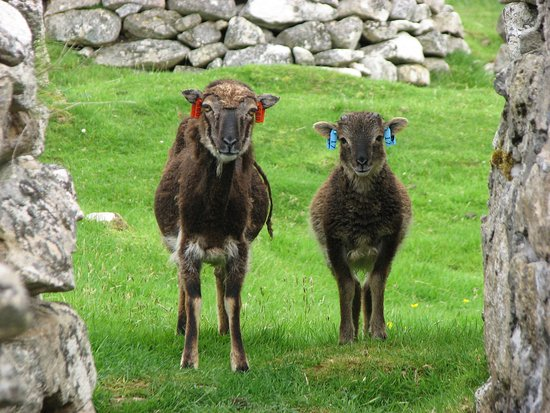

In [10]:
rm(list=ls())

# load the libraries
library(ggplot2)
library(ggfortify)
library(dplyr)
soay <- read.csv('datasets-master/SoaySheepFitness.csv')

glimpse(soay)


Rows: 50
Columns: 2
$ fitness   <int> 4, 3, 2, 14, 5, 2, 2, 5, 8, 4, 12, 6, 3, 2, 3, 0, 5, 3, 5, 6…
$ body.size <dbl> 6.373546, 7.183643, 6.164371, 8.595281, 7.329508, 6.179532, …


`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



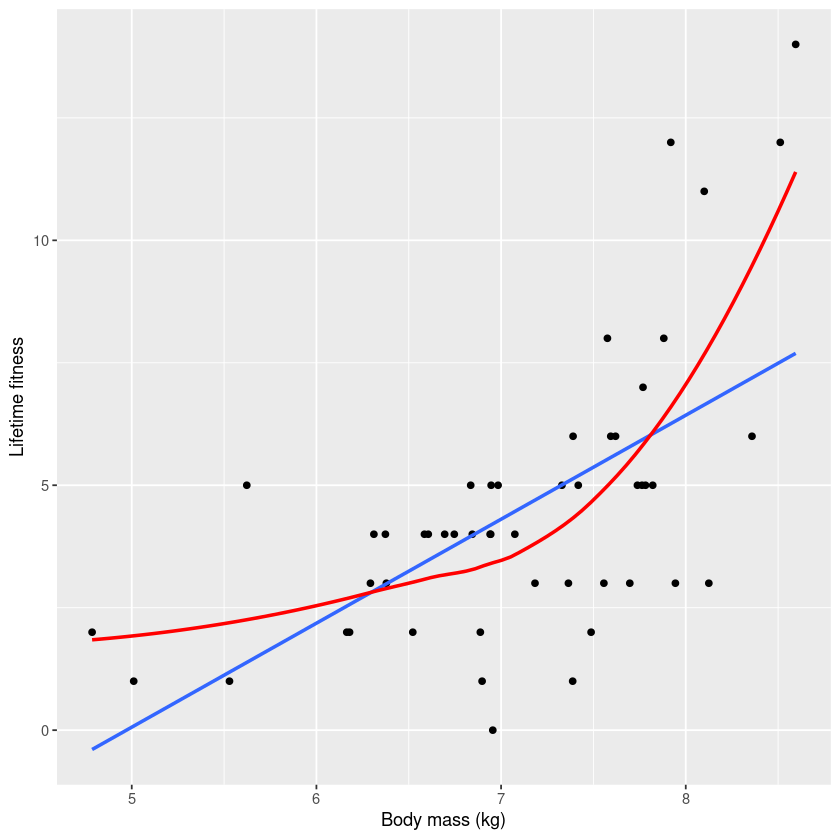

In [11]:
# plot the data

ggplot(soay, aes(x = body.size, y= fitness)) + 
    geom_point() +
    geom_smooth(method= 'lm', se=FALSE) + 
    geom_smooth(span= 1, colour='red', se=FALSE) +
    xlab("Body mass (kg)") + ylab("Lifetime fitness")


# Doing it wrong


Call:
lm(formula = fitness ~ body.size, data = soay)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2114 -1.1557  0.0029  0.9035  6.3068 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.5526     2.8688  -3.678 0.000593 ***
body.size     2.1228     0.4013   5.289 2.99e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.336 on 48 degrees of freedom
Multiple R-squared:  0.3682,	Adjusted R-squared:  0.3551 
F-statistic: 27.98 on 1 and 48 DF,  p-value: 2.99e-06


Warning message:
“`arrange_()` was deprecated in dplyr 0.7.0.
Please use `arrange()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


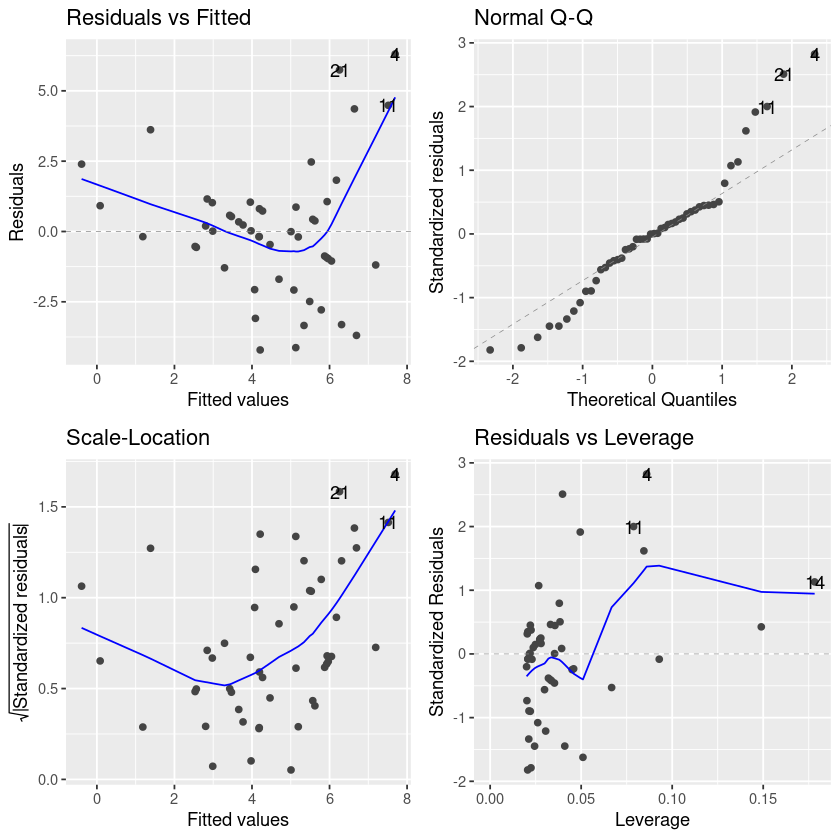

In [14]:
w.mod <- lm(fitness ~ body.size, data=soay)
summary(w.mod)
autoplot(w.mod)

# Doing it right


Call:
glm(formula = fitness ~ body.size, family = poisson(link = log), 
    data = soay)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7634  -0.6275   0.1142   0.5370   1.9578  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.42203    0.69432  -3.488 0.000486 ***
body.size    0.54087    0.09316   5.806 6.41e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 85.081  on 49  degrees of freedom
Residual deviance: 48.040  on 48  degrees of freedom
AIC: 210.85

Number of Fisher Scoring iterations: 4


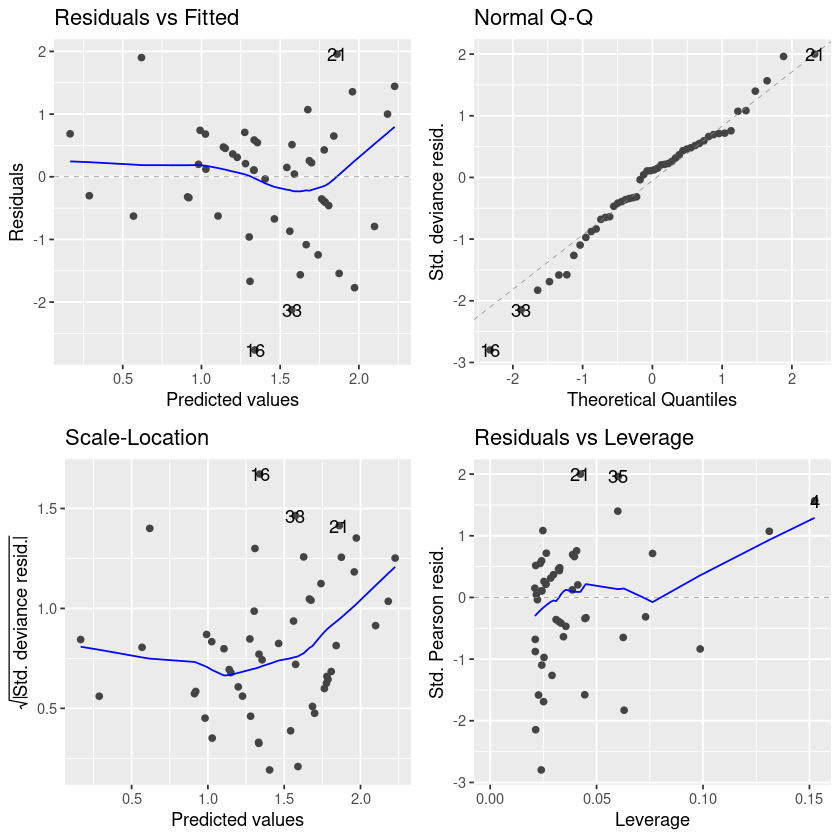

In [16]:
R.mod <- glm(fitness ~ body.size, family = poisson(link=log),  data=soay)
summary(R.mod)
autoplot(R.mod)

## Doing it in Bayesian to create intuition

In [21]:
library(rethinking)
names(soay)[2] <- "body_size"


In [22]:

b.m1 <- ulam(
alist(
    fitness ~ dpois( lambda ), # likelihood part, where the probability family distritution maps the predictions to the data

    # Linear predictor 
    
    log(lambda) <- intercept + beta_size*body_size, # log() is the link function, it makes sure that the predictions are on the log scale
    
    # Priors for regression parameters
    intercept ~ dnorm(0,10),
    beta_size ~ dnorm(0,10)
), 
    # model settings
    cores = 1, chains = 1, iter = 3000, data = soay
    

)


SAMPLING FOR MODEL 'dd1e99ef9120e91c24570c397adca90e' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.13 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 3000 [  0%]  (Warmup)
Chain 1: Iteration:  300 / 3000 [ 10%]  (Warmup)
Chain 1: Iteration:  600 / 3000 [ 20%]  (Warmup)
Chain 1: Iteration:  900 / 3000 [ 30%]  (Warmup)
Chain 1: Iteration: 1200 / 3000 [ 40%]  (Warmup)
Chain 1: Iteration: 1500 / 3000 [ 50%]  (Warmup)
Chain 1: Iteration: 1501 / 3000 [ 50%]  (Sampling)
Chain 1: Iteration: 1800 / 3000 [ 60%]  (Sampling)
Chain 1: Iteration: 2100 / 3000 [ 70%]  (Sampling)
Chain 1: Iteration: 2400 / 3000 [ 80%]  (Sampling)
Chain 1: Iteration: 2700 / 3000 [ 90%]  (Sampling)
Chain 1: Iteration: 3000 / 3000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.240322 seconds (Warm-up)
Chain 1:                0.209096 seconds (Sampling)


In [23]:
precis(b.m1, prob =.95, digits=3)

,mean,sd,2.5%,97.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
intercept,-2.4658248,0.72472322,-3.9229633,-1.1193231,233.3799,0.9996972
beta_size,0.5461907,0.09707691,0.3631981,0.7373067,233.0221,0.9997880


In [24]:
summary(R.mod)


Call:
glm(formula = fitness ~ body.size, family = poisson(link = log), 
    data = soay)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7634  -0.6275   0.1142   0.5370   1.9578  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.42203    0.69432  -3.488 0.000486 ***
body.size    0.54087    0.09316   5.806 6.41e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 85.081  on 49  degrees of freedom
Residual deviance: 48.040  on 48  degrees of freedom
AIC: 210.85

Number of Fisher Scoring iterations: 4
